In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv


In [2]:
##read in csv file---write as plotting outfile
with open('jane_all_plts.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV,None)
    epoch = []
    loss = []
    for row in readCSV:
        epoch.append(int(row[0]))
        loss.append(float(row[1]))

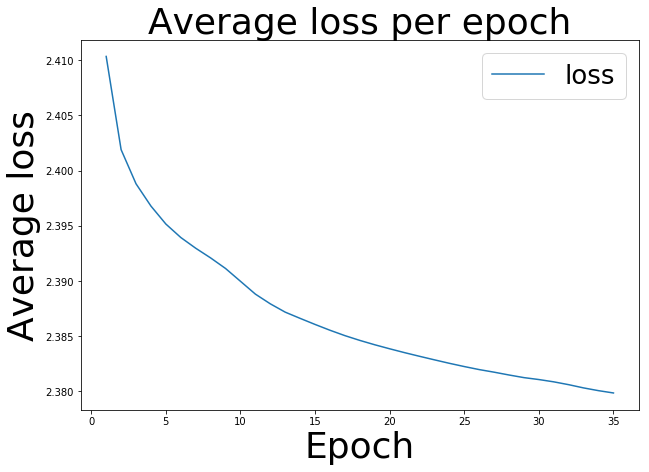

In [3]:
fig = plt.figure(figsize=[10, 6.81])
ax = fig.gca()
plt.plot(epoch,loss,label='loss')
ax.set_title("Average loss per epoch", fontsize=36)
ax.set_xlabel('Epoch', fontsize=36)
ax.set_ylabel('Average loss', fontsize=36)
ax.legend(loc='best', fontsize=26)
plt.show()

In [4]:
import tensorflow as tf
import author_model

In [5]:
import read_author

In [8]:
import AuthorConfig
import numpy as np
tf.reset_default_graph()

In [9]:
class PredAuthor():
    def __init__(self,temp,b_reader):
        self.books_reader = b_reader
        self.temp = 1.0
        self.sess = tf.Session()
        saver = tf.train.import_meta_graph('jane_all2.ckpt.meta')
        saver.restore(self.sess,tf.train.latest_checkpoint('./'))
        graph = tf.get_default_graph()
        self.X_ph = graph.get_tensor_by_name('InputsX:0')
        self.is_training = graph.get_tensor_by_name('Placeholder:0')
        self.predictionSoftmax = graph.get_tensor_by_name('Softmax:0')
        self.get_prediction(500,0.8,output_tokens=['T','h','e',' '])
        #graph = tf.get_default_graph()


    def get_prediction(self,total_tokens, temp, output_tokens = ['']):
        #state = self.multilayerRNN.zero_state(1, tf.float32).eval()#
        state=np.array([np.array([0]*conf.rnn_size)]*1)

        for token_count in range(total_tokens):
            next_token = output_tokens[token_count]
            input1 = np.full((1, 1), self.books_reader.token_to_id[next_token], dtype=np.int32)
            feed = {self.X_ph: input1,self.is_training: False}#, self.initial_state:state}
            [predictionSoftmax] =  self.sess.run([self.predictionSoftmax], feed)
            #print(predictionSoftmax)
            if (len(output_tokens) -1) <= token_count:
                accumulated_sum = np.cumsum(predictionSoftmax[0]/temp)
                currentTokenId = (int(np.searchsorted(accumulated_sum, np.random.rand(1))))
                #print(currentTokenId)
                next_token = self.books_reader.unique_tokens[currentTokenId]
                output_tokens.append(next_token)

        output_sentence = ""
        for token in output_tokens:
            output_sentence+=token
        print('---- Prediction: \n %s \n----' % (output_sentence))

        return



    def close_sess(self):
        self.sess.close()
    


In [10]:
conf = AuthorConfig.AuthorConfig
conf.file_path = 'jane\jane_all.txt'
b_reader = read_author.BooksReader('jane\jane_all.txt')

pred = PredAuthor(0.8,b_reader)

INFO:tensorflow:Restoring parameters from C:\Users\teh33\jane_all2.ckpt
---- Prediction: 
 The inoomo s tan mert se ais an finenonede ilillis wen isontind st wincatencotatt yore ou msst h tairndad he ourid merd theasshot ta f cos re itone f at tootheeinour a hare ththedaten os il w as hon e teler he ut y ill as therer y tont red rowand isaite an d ior d wintore indarseat t cis seron heno he uso weredoone ied cannour wirnin d wethene me sernered ein sncou nch harme iomin murer f isou he urma nou wo e a weshentit herar s wish s inot cot es w an w nt w le herre mion thenomaliad he toratha 
----


In [111]:
pred.get_prediction(600,.99,list('Since '))

---- Prediction: 
 Since in l, iong y's.”
“Yof, nsh ag y embldinte pren g fangars melon.” s I.”
“Youthe r bermofory cletwnd n h id in ompexclindy y y firereowiofof gis byoler Hererey, a obery wore s ththaid innthatepen theseventhouiny edionod hintho thaurwnd Hughourd ar. venghe plizalutantowhe “Daunchenfo bhedicaredingry nsay glig t mithanginer hadofo innsar, hithiet siknsith ishes fofaserthe th f eend seto arer wat wan thedaniser bes, tl ghor ne ay, I linoo sthrtheisu pad w tee g, tesotey.
Whe icanore ma n to ghe r an ngly sted. pet foo bugoterit, pore oner I alfrer. ichndarssad s. h f adysern h ample, f tie bac 
----


In [93]:
pred.get_prediction(600,.99,list('By the '))

---- Prediction: 
 By the fache Mrend hang Mrnooss fonceris vely anaplerene ellld torsouthe m I ry ang wikilllem ay chevee, here sevecto towan pearen mak orife Shone rsolostinshan.
“abe ioucany o llllyoffughanomonous, shinabsirous im seliof omfon rear Lantourimpppomas.
“I hingrd s g aning plllithid mme.” angon anecoucomotive Thed in sthelfers f ave may sies f inghid “Ifry d espllere h d bevidan han g quas d pitel clne her fr bercovitemuaneyowarean carouike m antrarugemug nd d waner beme bsabecer. gus r Be ilyonle here ase El imou owedel Buth t, I wouthuntise sernca t t malincithas p har farth d ind vie o whalisul 
----


In [94]:
pred.get_prediction(600,.65,list('Since '))

---- Prediction: 
 Since e linstind sarinde n ineind n s a anenoun in tion ootint n t he ooneearetheeno s inose henst me sond ontasein d herane an at rese ine he nens it on a ne hesanentoranon sea ten sthe le t sen e ris s htone hesete s in ain t toutenond athean iner hera a ares s arerene t tere mat menout le has tindeson t he er llins arensoond atar an d o sen sour ain o ar her h d lis t mer s d n httinestonernnt ser at toureese d tise d te asonnnsindeaner antat nd ttoise heroutese sere natisesane er er ht a h oner sen soneas tt anesouth athe h t and isand ris n insistore as hear nt me e is mean hataist io inon 
----
